In [1]:
import os
_dir = 'Academic Libraries/'
path = [_dir + d for d in os.listdir(_dir)]

In [3]:
import pandas as pd
import numpy as np
AL = pd.read_csv(path[0])
AL_descp = pd.read_excel(path[1],engine='openpyxl')

C:\Users\cb102\anaconda3\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,17,18,19,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
column_of_interest = ['Were annual total library expenses greater than or equal to $100,000','Total physical library collections (books, media and serials)',
                      'Total library collections (physical and electronic)']

In [5]:
id_of_interest = [AL_descp.loc[AL_descp.shortDescription == name,'varname'].iloc[0].lower() for name in column_of_interest] 

In [6]:
df_AL = AL[['year','unitid'] + id_of_interest]

In [7]:
df_AL.head()

,year,unitid,lexp100k,lpcllct,ltcllct
0,2020,100654,"Greater than or equal to $100,000",429850.0,754409
1,2020,100663,"Greater than or equal to $100,000",1099762.0,1733107
2,2020,100690,"Greater than or equal to $100,000",51943.0,52185
3,2020,100706,"Greater than or equal to $100,000",219735.0,905444
4,2020,100724,"Greater than or equal to $100,000",357107.0,433694


In [8]:
m = {'Greater than or equal to $100,000' : 'Yes',
     'Less than $100,000': 'No'}

In [9]:
df_AL['library_expense'] = df_AL.lexp100k.map(m)

C:\Users\cb102\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_AL['library_expense'] = df_AL['library_expense'].replace(np.nan,'Not Applicable')

C:\Users\cb102\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_AL = df_AL[['year','unitid','ltcllct','library_expense']]
df_AL.columns = ['year','unitid','total_num_collections','expense']

In [21]:
df_AL.to_csv('df_AC.csv',index = False)

(array([1.759e+03, 3.400e+01, 1.900e+01, 1.000e+01, 5.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

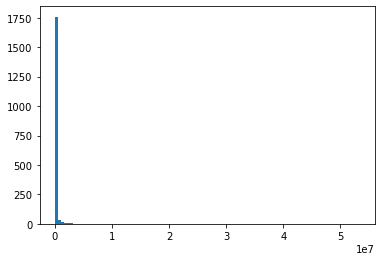

In [33]:
no = df_AL[df_AL.expense == 'No']['total_num_collections']
